# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

**Sumber Dataset (Kaggle)** :  https://www.kaggle.com/code/rxyzny/klasifikasi-diabetes-dataset/input

Dataset ini berisi informasi kesehatan dari 768 individu yang digunakan untuk memprediksi apakah seseorang berisiko mengalami diabetes berdasarkan sejumlah variabel medis dan demografis. Dataset ini umum digunakan dalam penelitian kesehatan, pengembangan model machine learning, serta pembelajaran terkait klasifikasi medis.

Variabel target adalah Outcome, yaitu indikator apakah pasien terdiagnosis diabetes (1) atau tidak (0).

Kolom pada Dataset
1. Pregnancies: Jumlah kehamilan yang pernah dialami pasien (integer).
Digunakan sebagai salah satu faktor risiko terkait metabolisme.

2. Glucose: Kadar glukosa plasma (mg/dL) setelah tes toleransi glukosa oral.
Menjadi indikator terkuat untuk prediksi diabetes.

3. BloodPressure: Tekanan darah diastolik (mmHg).
Nilai 0 pada kolom ini menandakan data tidak tercatat.

4. SkinThickness: Ketebalan lipatan kulit triceps (mm).
Digunakan sebagai estimasi lemak tubuh. Terdapat nilai 0 yang menunjukkan missing value terselubung.

5. Insulin: Kadar insulin serum (mu U/ml). Nilai 0 umumnya berarti data tidak diukur.

6. BMI (Body Mass Index): Indeks massa tubuh berdasarkan berat dan tinggi (kg/m²). Rentang tinggi BMI biasanya berhubungan dengan risiko diabetes.

7. DiabetesPedigreeFunction: Ukuran probabilitas risiko diabetes berdasarkan riwayat keluarga. Nilai lebih tinggi → risiko genetik lebih besar.

8. Age: Usia pasien (tahun). Usia senior umumnya lebih rentan terhadap diabetes.

9. Outcome:
   - Variabel target:
     - 0 → pasien tidak menderita diabetes
     - 1 → pasien terdiagnosis diabetes

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from joblib import dump

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan informasi dasar dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Memeriksa nilai yang hilang
print("\nJumlah Nilai Hilang per Kolom:")
df.isnull().sum()


Jumlah Nilai Hilang per Kolom:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
# Memeriksa data duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 0


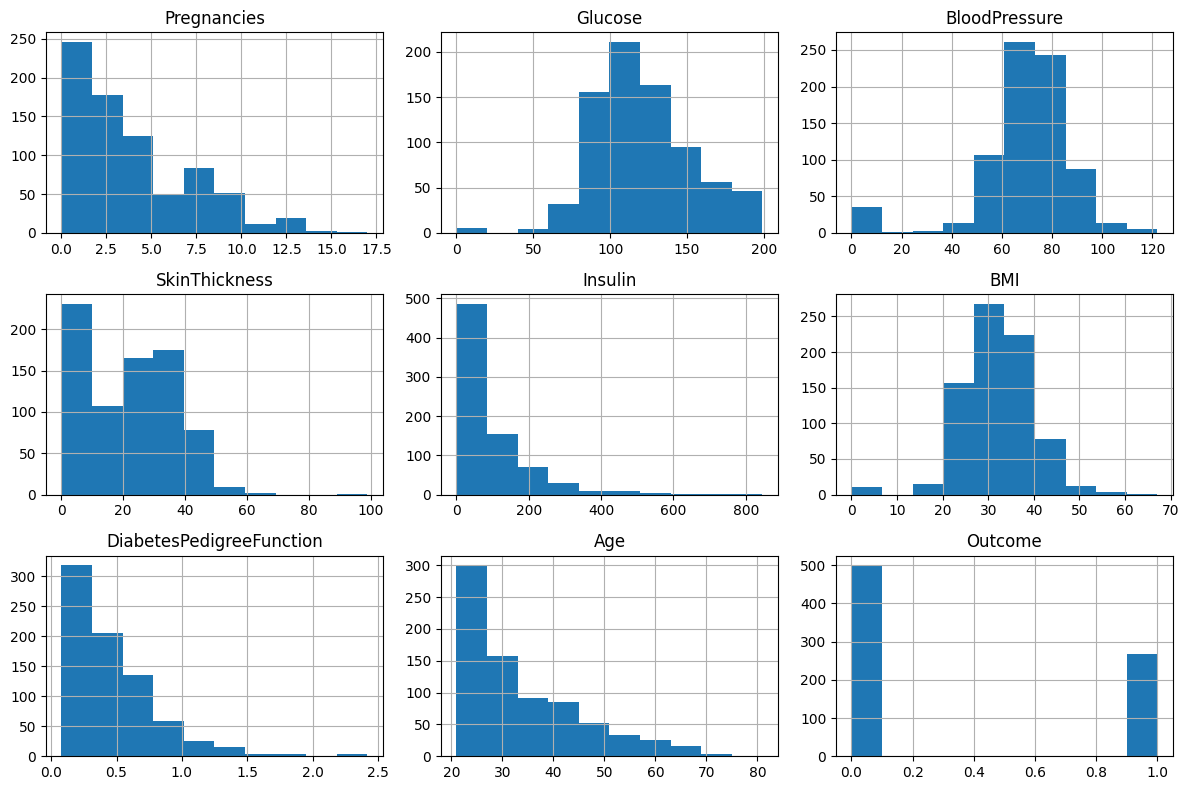

In [9]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# Membuat salinan DataFrame
df = df.copy()

In [11]:
# Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_scaled = scaler.fit_transform(X)

In [51]:
# Simpan hasil
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_columns]
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

output_dir = "diabetes_preprocessing"
os.makedirs(output_dir, exist_ok=True)

X_train.to_csv(f"{output_dir}/X_train_scaled.csv", index=False)
X_test.to_csv(f"{output_dir}/X_test_scaled.csv", index=False)
y_train.to_csv(f"{output_dir}/y_train.csv", index=False)
y_test.to_csv(f"{output_dir}/y_test.csv", index=False)

joblib.dump(scaler, f"{output_dir}/scaler_diabetes.joblib")

print("✅ Preprocessing selesai dan semua file berhasil disimpan.")

✅ Preprocessing selesai dan semua file berhasil disimpan.
